In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,mean_squared_error

import seaborn as sns

In [83]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [84]:
taxis = sns.load_dataset('taxis')

In [85]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [86]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])

taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])

In [87]:
taxis['ride_time'] = taxis['dropoff'] - taxis['pickup']

In [88]:
taxis['ride_time'] = (pd.Timestamp('00:00:00') + taxis['ride_time']).dt.time

In [89]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ride_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,00:06:15
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,00:07:05
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,00:07:24
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,00:25:52
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,00:09:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,00:03:34
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,00:56:23
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,00:19:07
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,00:05:04


In [90]:
taxis.sort_values('pickup')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ride_time
6203,2019-02-28 23:29:03,2019-02-28 23:32:35,1,0.90,5.0,0.00,0.0,6.30,green,cash,Old Astoria,Long Island City/Queens Plaza,Queens,Queens,00:03:32
884,2019-03-01 00:03:29,2019-03-01 00:13:32,3,2.16,10.0,2.00,0.0,15.80,yellow,credit card,Lincoln Square East,Upper East Side North,Manhattan,Manhattan,00:10:03
2882,2019-03-01 00:08:32,2019-03-01 00:29:47,3,7.35,22.5,1.00,0.0,27.30,yellow,credit card,East Chelsea,Mott Haven/Port Morris,Manhattan,Bronx,00:21:15
4212,2019-03-01 00:15:53,2019-03-01 00:47:58,1,7.00,25.5,7.30,0.0,36.60,yellow,credit card,West Village,Astoria,Manhattan,Queens,00:32:05
661,2019-03-01 00:29:22,2019-03-01 00:32:48,4,0.74,4.5,1.00,0.0,9.30,yellow,credit card,Meatpacking/West Village West,Meatpacking/West Village West,Manhattan,Manhattan,00:03:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,2019-03-31 22:13:37,2019-03-31 22:22:50,1,1.00,7.5,0.70,0.0,12.00,yellow,credit card,SoHo,Lower East Side,Manhattan,Manhattan,00:09:13
2849,2019-03-31 22:32:27,2019-03-31 22:34:45,1,0.40,3.5,1.45,0.0,8.75,yellow,credit card,Midtown North,Lincoln Square East,Manhattan,Manhattan,00:02:18
542,2019-03-31 22:51:53,2019-03-31 22:55:10,1,0.67,4.5,1.66,0.0,9.96,yellow,credit card,West Village,Meatpacking/West Village West,Manhattan,Manhattan,00:03:17
4067,2019-03-31 23:15:03,2019-03-31 23:27:12,1,3.03,11.5,3.82,0.0,19.12,yellow,credit card,Midtown East,Upper West Side South,Manhattan,Manhattan,00:12:09


In [91]:
taxis['fare'].sum()

84214.87

In [92]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
 14  ride_time        6433 non-null   object 

In [93]:
taxis.describe(include = 'all')

C:\Users\Owner\AppData\Local\Temp\ipykernel_22880\2792838859.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxis.describe(include = 'all')
C:\Users\Owner\AppData\Local\Temp\ipykernel_22880\2792838859.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  taxis.describe(include = 'all')


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,ride_time
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388,6433
unique,6414,6425,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5,2046
top,2019-03-13 10:57:06,2019-03-04 18:08:13,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan,00:05:25
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206,15
first,2019-02-28 23:29:03,2019-02-28 23:32:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-31 23:43:45,2019-04-01 00:13:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
taxis['passengers'].mean()

1.539250738380227

In [95]:
taxis['distance'].mean()

3.0246168195243133

In [96]:
taxis['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [97]:
z = pd.get_dummies(taxis['payment'], drop_first = True)

In [98]:
z

,credit card
0,1
1,0
2,1
3,1
4,1
...,...
6428,1
6429,1
6430,0
6431,1


In [99]:
g = pd.get_dummies(taxis['color'], drop_first = True)
g
taxis['color'] = g

In [112]:
X = taxis.iloc[:,2:9]
X

,passengers,distance,fare,tip,tolls,total,color
0,1,1.60,7.0,2.15,0.0,12.95,1
1,1,0.79,5.0,0.00,0.0,9.30,1
2,1,1.37,7.5,2.36,0.0,14.16,1
3,1,7.70,27.0,6.15,0.0,36.95,1
4,3,2.16,9.0,1.10,0.0,13.40,1
...,...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36,0
6429,1,18.74,58.0,0.00,0.0,58.80,0
6430,1,4.14,16.0,0.00,0.0,17.30,0
6431,1,1.12,6.0,0.00,0.0,6.80,0


In [113]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the data into training and testing sets
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

Wall time: 12.1 ms


In [114]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, z_train)

# Make predictions on the testing data
z_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(z_test, z_pred)
print("Accuracy:", accuracy)

# Calculate accuracy
mse = mean_squared_error(z_test, z_pred)
print("MSE:", mse)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.947940947940948
MSE: 0.052059052059052056
Wall time: 210 ms


<AxesSubplot:>

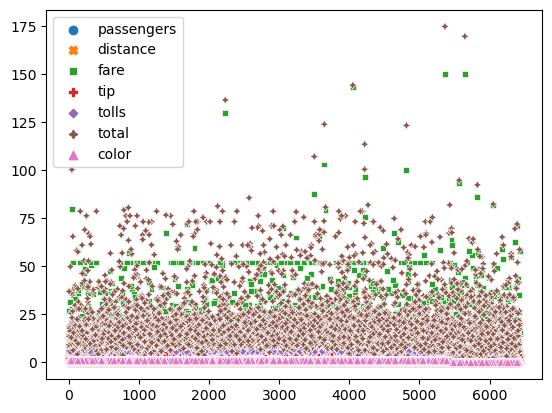

In [115]:
sns.scatterplot(data = X_train)

In [118]:
%%time

from sklearn.tree import DecisionTreeClassifier,plot_tree

#Create a decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
tree_classifier.fit(X_train, z_train)

# Make predictions on the testing data
z_pred = tree_classifier.predict(X_test)

# Calculate accuracy
accuracyDT = accuracy_score(z_test, z_pred)
print("Accuracy:", accuracyDT)

# Calculate accuracy
mseDT = mean_squared_error(z_test, z_pred)
print("MSE:", mseDT)

Accuracy: 0.9386169386169386
MSE: 0.061383061383061384
Wall time: 28.2 ms


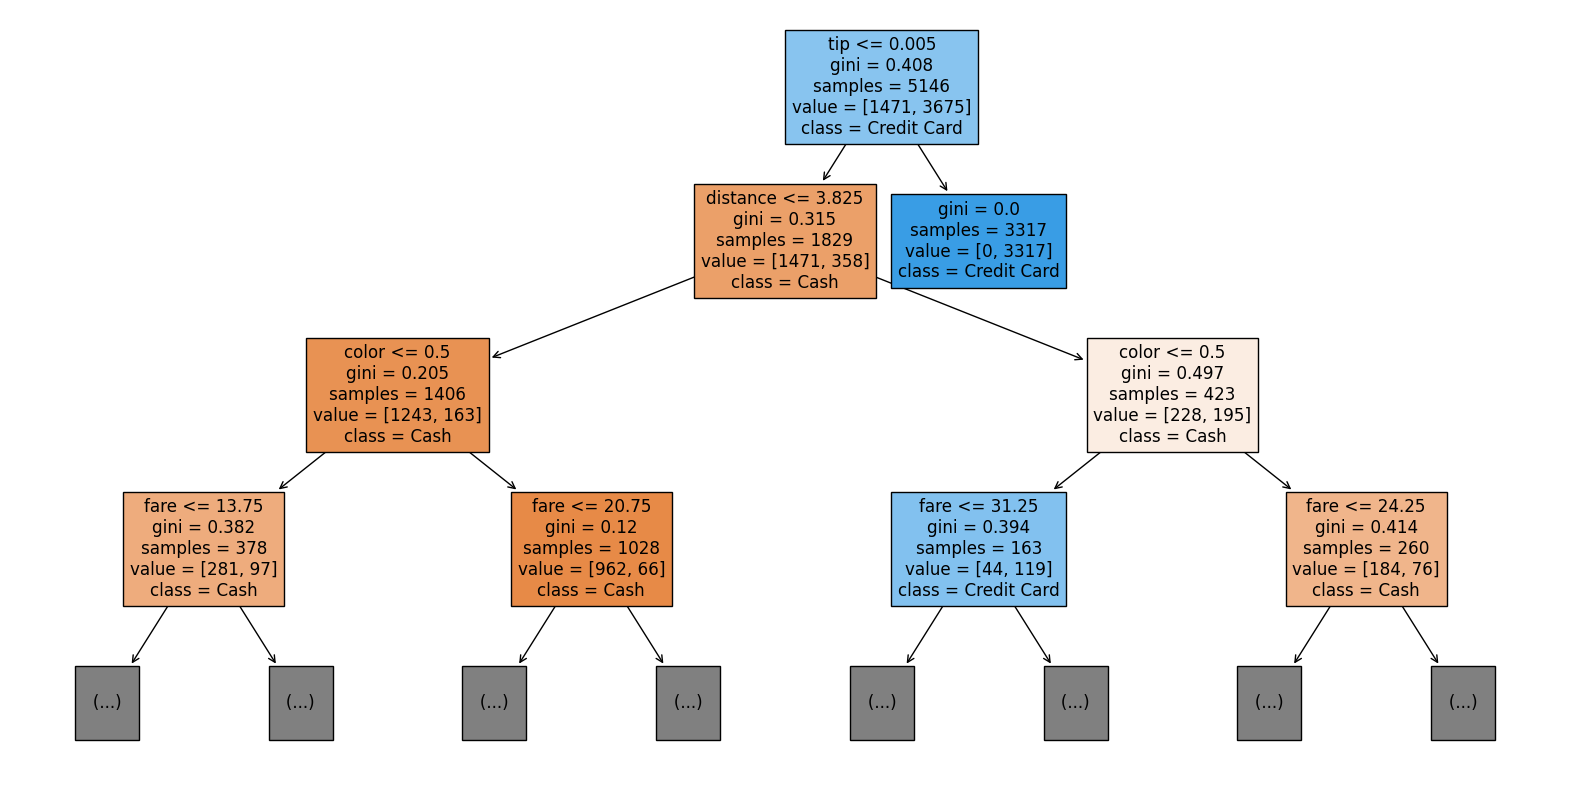

Wall time: 1.13 s


In [124]:
%%time

# Assuming tree_classifier is your trained decision tree classifier
plt.figure(figsize=(20,10))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, max_depth = 3, class_names=['Cash', 'Credit Card'])
plt.show()